## **IMPORTING THE LIBRARIES**

In [24]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [25]:
path = '/content/drive/MyDrive/CAPSTONE/Project/ARNOLD CAT MAP/'
name = '1'
extension = '.png'

## **DEFINING FUNCTIONS TO IMPLEMENT A.C.M**

In [26]:
# FUNCTION TO GET IMAGE MATRIX
def getImageMatrix(location):
  image = Image.open(location, mode='r')
  pix = image.load()
  color = 1
  if type(pix[0,0]) == int:
    color = 0
  image_size = image.size
  image_matrix = []
  for width in range(int(image_size[0])):
    row = []
    for height in range(int(image_size[1])):
      row.append((pix[width, height]))
    image_matrix.append(row)
  return image_matrix , image_size[0], image_size[1], color

In [27]:
# FUNCTION TO GET GRAY IMAGE MATRIX
def getImageMatrix_gray(location):
  image = Image.open(location, mode='r').convert('LA')
  pix = image.load()
  image_size = image.size
  image_matrix = []
  for width in range(int(image_size[0])):
    row = []
    for height in range(int(image_size[1])):
      row.append((pix[width, height]))
    image_matrix.append(row)
  return image_matrix, image_size[0], image_size[1]

In [28]:
# FUNCTION FOR ARNOLD CAT TRANSFORMATION
def ArnoldCatTransform(img, num):
  rows,cols,ch = img.shape
  n = rows
  img_arnold = np.zeros([rows,cols,ch])
  for x in range(0,rows):
    for y in range(0,cols):
      img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
  return img_arnold

In [29]:
# FUNCTION FOR ARNOLD CAT ENCRYPTION
def ArnoldCatEncryption(imageName, key):
  img = cv2.imread(imageName)
  for i in range(0,key):
    img = ArnoldCatTransform(img, i)
  cv2.imwrite(path + "Encrypted_" + name + extension, img)
  # return img

In [30]:
# FUNCTION FOR ARNOLD CAT DECRYPTION

"""This function implements the rule of thumb"""

def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(path + "Decrypted_" + name + extension,img)
    # return img

## **ORIGINAL IMAGE**

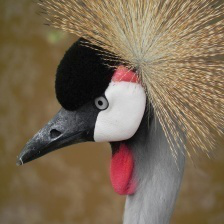

In [31]:
# ORIGINAL IMAGE
img = cv2.imread(path + name + extension)
cv2_imshow(img)

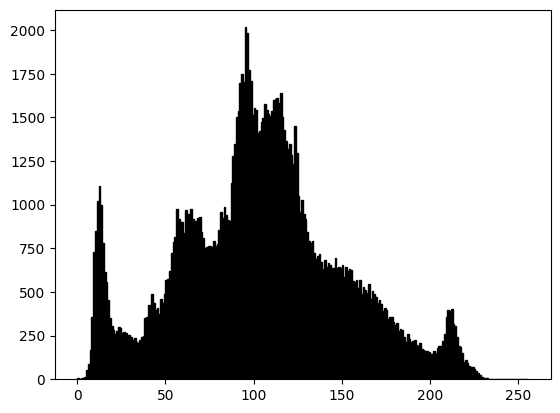

In [32]:
# HISTOGRAM OF ORIGINAL IMAGE
plt.hist(img.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

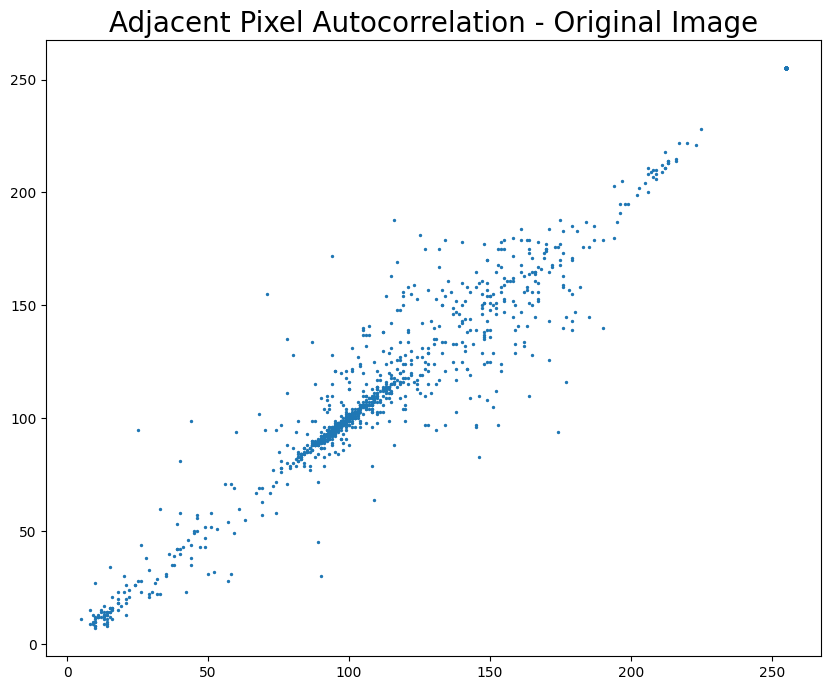

In [33]:
# Original Image
ImageMatrix,image_size,color = getImageMatrix_gray(path+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

## **ENCRYPTION**


In [34]:
key = 40

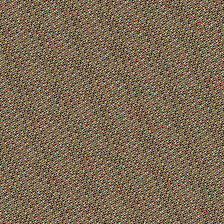

In [35]:
ArnoldCatEncryption(path + name + extension, key)
ArnoldCatEncryptionIm = cv2.imread(path + "Encrypted_" + name + extension)
cv2_imshow(ArnoldCatEncryptionIm)

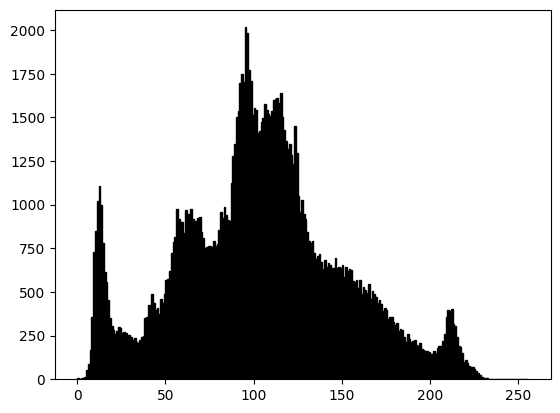

In [36]:
# HISTOGRAM OF ENCRYPTED IMAGE
plt.hist(ArnoldCatEncryptionIm.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

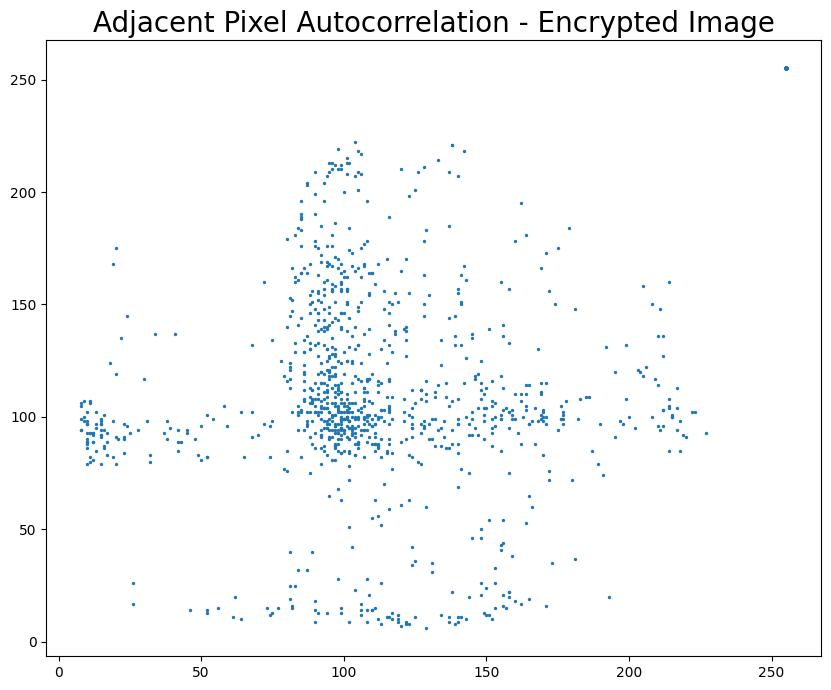

In [37]:
# ENCRYPTED IMAGE
ImageMatrix,image_size,color = getImageMatrix_gray(path+'Encrypted_'+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.show()

## **DECRYPTION**

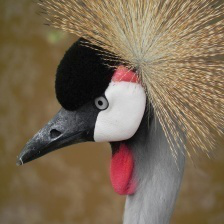

In [38]:
ArnoldCatDecryption(path + "Encrypted_" + name + extension, key)
ArnoldCatDecryptionIm = cv2.imread(path + "Decrypted_" + name + extension)
cv2_imshow(ArnoldCatDecryptionIm)

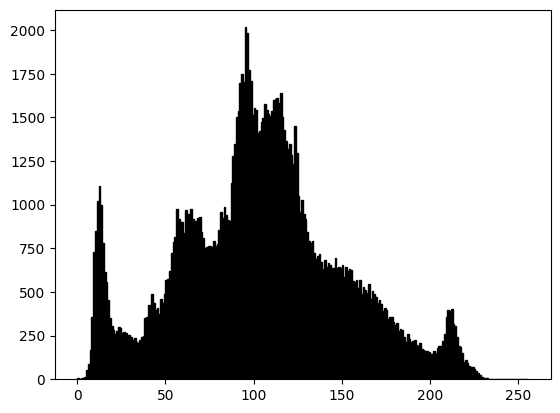

In [39]:
# HISTOGRAM OF DECRYPTED IMAGE
plt.hist(ArnoldCatDecryptionIm.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

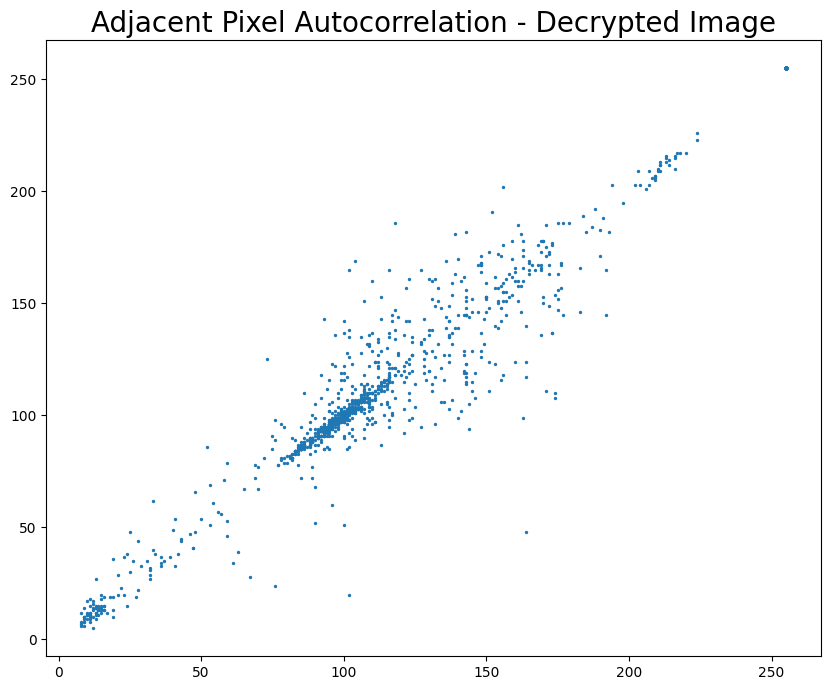

In [40]:
# DECRYPTED IMAGE
ImageMatrix,image_size,color = getImageMatrix_gray(path + "Decrypted_" + name + extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Decrypted Image', fontsize=20)
plt.show()

## **CALCULATING THE CORRELATION COEFFICIENT**

In [41]:
from numpy import asarray

In [42]:
# GENERATING THE ORIGINAL IMAGE ARRAY
original_image_array = cv2.imread(path + name + extension)
original_image_array = asarray(original_image_array)
original_image_array = original_image_array.reshape(-1)

In [43]:
# GENERATINGTHE ENCRYPTED IMAGE ARRAY
encrypted_image_array = cv2.imread(path + "Encrypted_" + name + extension)
encrypted_image_array = asarray(encrypted_image_array)
encrypted_image_array = encrypted_image_array.reshape(-1)

In [44]:
# GENERATINGTHE DECRYPTED IMAGE ARRAY
decrypted_image_array = cv2.imread(path + "Decrypted_" + name + extension)
decrypted_image_array = asarray(decrypted_image_array)
decrypted_image_array = decrypted_image_array.reshape(-1)

In [45]:
# ORIGINAL VS ENCRYPTED CORRELATION COEFFICIENT
np.corrcoef(original_image_array, encrypted_image_array)

array([[1.       , 0.1207434],
       [0.1207434, 1.       ]])

In [46]:
# ORIGINAL VS DECRYPTED CORRELATION COEFFICIENT
np.corrcoef(original_image_array, decrypted_image_array)

array([[1., 1.],
       [1., 1.]])